<a href="https://colab.research.google.com/github/anudeeplearning/Single-Asset-Trading-Strategies/blob/main/MA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf, numpy as np, pandas as pd, datetime as dt, matplotlib.pyplot as plt, scipy.stats as scs

In [ ]:
ticker = 'AAPL'

In [ ]:
start = dt.datetime(2019,1,1)
end=dt.datetime.now()

df=yf.download(ticker,start,end)
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.221371,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.414238,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.883354,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.803490,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.486015,164101200
...,...,...,...,...,...,...
2022-07-27,152.580002,157.330002,152.160004,156.789993,156.789993,78620700
2022-07-28,156.979996,157.639999,154.410004,157.350006,157.350006,81378700
2022-07-29,161.240005,163.630005,159.500000,162.509995,162.509995,101689200


In [ ]:
df['SMA50']=df['Adj Close'].rolling(50).mean()

In [ ]:
df['Position'] = np.where(df['Adj Close']>df['SMA50'],1,0)
df['Position']=df['Position'].shift()

In [ ]:
df['StrategyPct'] = df['Adj Close'].pct_change(1) * df['Position']

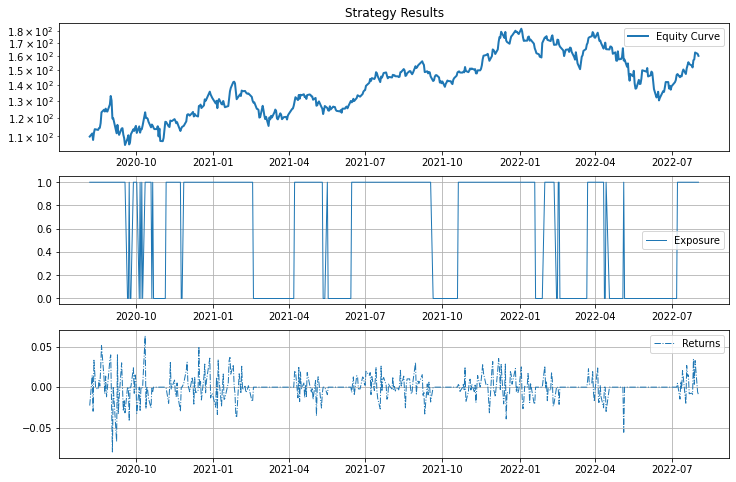

In [ ]:
points=500

plotting_data = df[-points:]
fig = plt.figure(figsize=(12,8))

#First Subplot
ax = fig.add_subplot(311)
ax.set_title('Strategy Results')
ax.semilogy(plotting_data['Adj Close'], linestyle='-', label='Equity Curve', linewidth=2.0) 
ax.legend()
ax.grid(False)

#Second Subplot
ax = fig.add_subplot(312)
ax.plot(plotting_data['Position'], label='Exposure', linestyle='-', linewidth=1.0)
ax.legend()
ax.grid(True)

#Third Subplot
ax = fig.add_subplot(313)
ax.plot(plotting_data['StrategyPct'], label='Returns', linestyle='-.', linewidth=1.0)
ax.legend()
ax.grid(True)